In [23]:
import pandas as pd 
import numpy as np 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler

In [24]:
df = pd.read_csv('laliga_player_stats_english.csv')
df

,Team,Position,Shirt number,Name,Minutes played,Games played,Percentage of games played,Full games played,Percentage of full games played,Games started,...,Corners,Tackles.1,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt
0,Athletic Club,Goalkeeper,NaN,Hodei Oleaga,0.000,0,0.00%,0,0.00%,0,...,0,0,0,0,0,0.0,0.0,0,0,0
1,Athletic Club,Goalkeeper,1.0,A. Remiro,0.000,0,0.00%,0,0.00%,0,...,0,0,0,0,0,0.0,0.0,0,0,0
2,Athletic Club,Goalkeeper,13.0,Herrerín,2.790,31,82.00%,31,82.00%,31,...,0,0,25,6,19,887.0,128.0,759,1,0
3,Athletic Club,Goalkeeper,25.0,Unai Simón,630.000,7,18.00%,7,18.00%,7,...,0,0,3,2,1,155.0,49.0,106,0,0
4,Athletic Club,Defender,3.0,Núñez,1.063,12,32.00%,11,29.00%,11,...,0,15,107,38,69,536.0,457.0,78,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,Villarreal CF,Midfielder,37.0,Iván Martín,0.000,0,0.00%,0,0.00%,0,...,0,0,0,0,0,0.0,0.0,0,0,0
552,Villarreal CF,Midfielder,42.0,Andrei Ratiu,0.000,0,0.00%,0,0.00%,0,...,0,0,0,0,0,0.0,0.0,0,0,0
553,Villarreal CF,Forward,7.0,Gerard,2.317,35,92.00%,16,42.00%,25,...,0,23,344,219,125,740.0,676.0,59,5,6
554,Villarreal CF,Forward,9.0,Bacca,1.259,33,87.00%,2,5.00%,12,...,1,4,127,80,47,270.0,252.0,16,2,5


In [25]:
df.shape

(556, 62)

In [26]:
df.describe()

,Shirt number,Minutes played,Games played,Full games played,Games started,Games where substituted,Yellow Cards,Red Cards,Second Yellows,Goals scored,...,Corners,Tackles.1,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt
count,526.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,...,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000
mean,15.688213,125.863646,18.602518,10.798561,14.825540,7.803957,3.284173,0.138489,0.084532,1.696043,...,6.485612,22.598921,151.870504,102.411871,49.458633,298.276849,287.366338,86.906475,1.705036,1.059353
std,10.143810,239.665055,12.462351,10.560289,11.746272,7.635341,3.320995,0.398954,0.309102,3.503828,...,19.998328,22.882684,137.610291,97.469928,58.638456,323.996696,303.818053,126.842323,4.109673,1.746575
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.250000,1.546250,6.000000,1.000000,3.750000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,20.000000,12.000000,6.750000,1.436000,1.701750,7.000000,0.000000,0.000000
50%,15.000000,2.413000,20.000000,8.000000,14.500000,5.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,16.000000,127.000000,79.000000,32.000000,165.000000,166.000000,43.500000,0.000000,0.000000
75%,22.000000,90.000000,31.000000,18.250000,25.000000,13.000000,5.000000,0.000000,0.000000,2.000000,...,1.000000,38.000000,247.000000,170.000000,73.250000,579.250000,549.500000,113.500000,2.000000,1.000000
max,57.000000,999.000000,38.000000,38.000000,38.000000,34.000000,15.000000,2.000000,2.000000,36.000000,...,170.000000,110.000000,746.000000,452.000000,442.000000,987.000000,987.000000,988.000000,70.000000,10.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Team                                   556 non-null    object 
 1   Position                               556 non-null    object 
 2   Shirt number                           526 non-null    float64
 3   Name                                   556 non-null    object 
 4   Minutes played                         556 non-null    float64
 5   Games played                           556 non-null    int64  
 6   Percentage of games played             556 non-null    object 
 7   Full games played                      556 non-null    int64  
 8   Percentage of full games played        556 non-null    object 
 9   Games started                          556 non-null    int64  
 10  Percentage of games started            556 non-null    object 
 11  Games 

In [28]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Percentage of games played']= label_encoder.fit_transform(df['Percentage of games played'])
df['Percentage of full games played']= label_encoder.fit_transform(df['Percentage of full games played'])
df['Percentage of games started']= label_encoder.fit_transform(df['Percentage of games started'])
df['Percentage of games where substituted']= label_encoder.fit_transform(df['Percentage of games where substituted'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Team                                   556 non-null    object 
 1   Position                               556 non-null    object 
 2   Shirt number                           526 non-null    float64
 3   Name                                   556 non-null    object 
 4   Minutes played                         556 non-null    float64
 5   Games played                           556 non-null    int64  
 6   Percentage of games played             556 non-null    int32  
 7   Full games played                      556 non-null    int64  
 8   Percentage of full games played        556 non-null    int32  
 9   Games started                          556 non-null    int64  
 10  Percentage of games started            556 non-null    int32  
 11  Games 

In [30]:
df.isnull().sum()

Team                         0
Position                     0
Shirt number                30
Name                         0
Minutes played               0
                            ..
Passes                       0
Short passes                 0
Long passes                  0
Through balls                0
Goals scored per attempt     0
Length: 62, dtype: int64

In [31]:
df.dropna(inplace=True)
df

,Team,Position,Shirt number,Name,Minutes played,Games played,Percentage of games played,Full games played,Percentage of full games played,Games started,...,Corners,Tackles.1,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt
1,Athletic Club,Goalkeeper,1.0,A. Remiro,0.000,0,0,0,0,0,...,0,0,0,0,0,0.00,0.000,0,0,0
2,Athletic Club,Goalkeeper,13.0,Herrerín,2.790,31,32,31,32,31,...,0,0,25,6,19,887.00,128.000,759,1,0
3,Athletic Club,Goalkeeper,25.0,Unai Simón,630.000,7,5,7,5,7,...,0,0,3,2,1,155.00,49.000,106,0,0
4,Athletic Club,Defender,3.0,Núñez,1.063,12,11,11,9,11,...,0,15,107,38,69,536.00,457.000,78,1,0
5,Athletic Club,Defender,4.0,I. Martínez,2.903,33,34,32,33,33,...,0,53,329,162,167,1.44,1.074,361,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,Villarreal CF,Midfielder,37.0,Iván Martín,0.000,0,0,0,0,0,...,0,0,0,0,0,0.00,0.000,0,0,0
552,Villarreal CF,Midfielder,42.0,Andrei Ratiu,0.000,0,0,0,0,0,...,0,0,0,0,0,0.00,0.000,0,0,0
553,Villarreal CF,Forward,7.0,Gerard,2.317,35,36,16,15,25,...,0,23,344,219,125,740.00,676.000,59,5,6
554,Villarreal CF,Forward,9.0,Bacca,1.259,33,34,2,18,12,...,1,4,127,80,47,270.00,252.000,16,2,5


In [32]:
df.isnull().sum()

Team                        0
Position                    0
Shirt number                0
Name                        0
Minutes played              0
                           ..
Passes                      0
Short passes                0
Long passes                 0
Through balls               0
Goals scored per attempt    0
Length: 62, dtype: int64

In [33]:
duplicate = df[df.duplicated()]
duplicate

,Team,Position,Shirt number,Name,Minutes played,Games played,Percentage of games played,Full games played,Percentage of full games played,Games started,...,Corners,Tackles.1,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt


In [34]:
from claming import Cleansing, Matching

In [35]:
clean = Cleansing()
match = Matching()

In [36]:
match.levenshtein_match('Hodei Olega', 'Hodei Olega')

{'first_text': 'Hodei olega',
 'second_text': 'Hodei olega',
 'score': 1.0,
 'max_score': 1}

In [37]:
groupby_Team = df.groupby(['Team'])[['Games played' , 'Shots' , 'Goals scored', 
                                     'Assists','Yellow Cards','Red Cards','Passes','Offsides','Penalties scored']].sum().reset_index()
groupby_Team

,Team,Games played,Shots,Goals scored,Assists,Yellow Cards,Red Cards,Passes,Offsides,Penalties scored
0,Athletic Club,534,327,40,29,115,4,7158.868,75,5
1,Atlético de Madrid,513,339,53,36,97,5,6968.400,79,3
2,CD Leganés,452,224,23,20,88,4,9069.697,54,3
3,D. Alavés,503,299,33,23,98,1,9489.321,55,2
4,FC Barcelona,511,444,87,60,74,2,5321.519,95,8
5,Getafe CF,503,283,46,32,95,6,8613.360,99,6
6,Girona FC,526,321,37,23,78,4,7640.791,60,6
7,Levante UD,509,314,55,40,98,7,8745.055,76,5
8,R. Valladolid CF,515,313,29,19,92,0,6766.493,93,4
9,RC Celta,494,329,52,35,68,6,9380.886,89,7


In [38]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Team'.
groupby_Team['Team']= label_encoder.fit_transform(groupby_Team['Team'])

In [39]:
groupby_Team.head()

,Team,Games played,Shots,Goals scored,Assists,Yellow Cards,Red Cards,Passes,Offsides,Penalties scored
0,0,534,327,40,29,115,4,7158.868,75,5
1,1,513,339,53,36,97,5,6968.400,79,3
2,2,452,224,23,20,88,4,9069.697,54,3
3,3,503,299,33,23,98,1,9489.321,55,2
4,4,511,444,87,60,74,2,5321.519,95,8


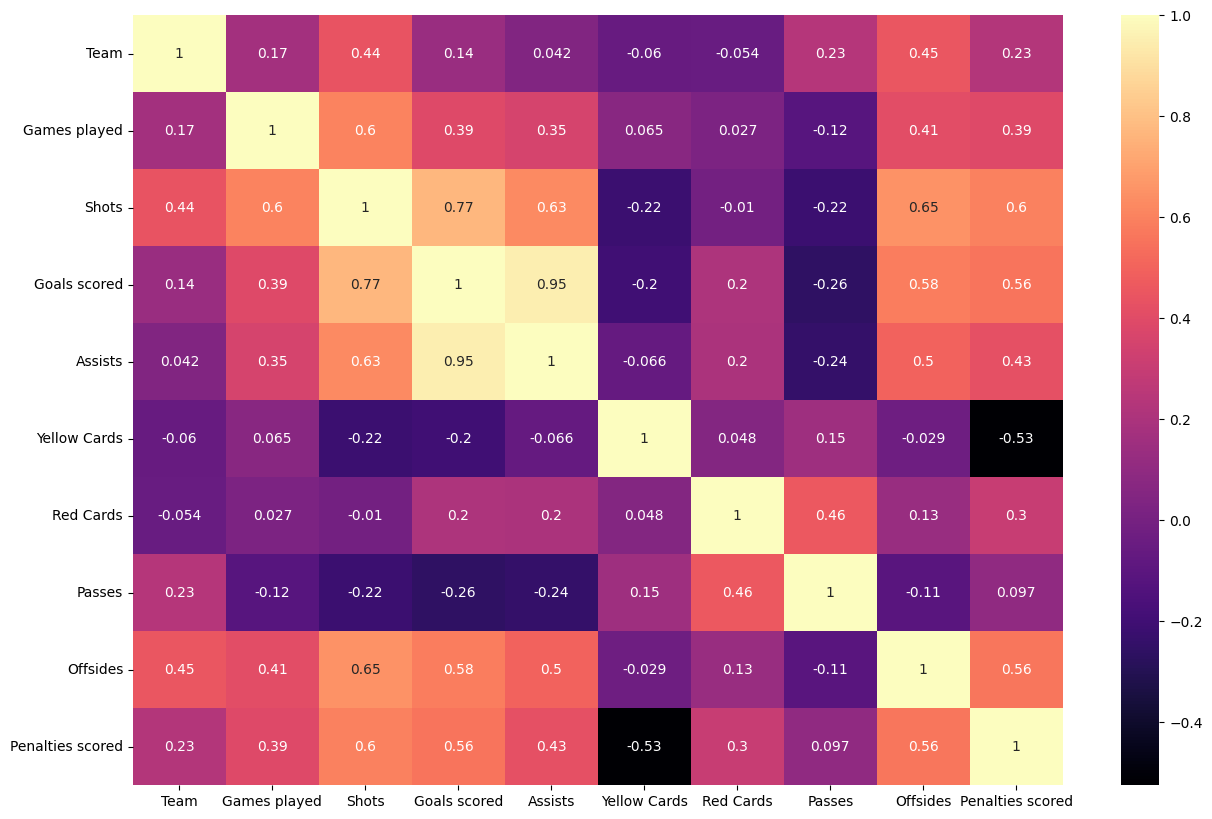

In [40]:
plt.figure(figsize=(15,10))
sns.heatmap(groupby_Team.corr(), cmap='magma', annot=True)
plt.show()

In [41]:
groupby_Team.corr()

,Team,Games played,Shots,Goals scored,Assists,Yellow Cards,Red Cards,Passes,Offsides,Penalties scored
Team,1.000000,0.166101,0.436212,0.135639,0.042132,-0.059861,-0.053985,0.233909,0.447187,0.229784
Games played,0.166101,1.000000,0.604181,0.389321,0.351542,0.064908,0.027157,-0.119622,0.409914,0.391704
Shots,0.436212,0.604181,1.000000,0.769508,0.628135,-0.220257,-0.010284,-0.216552,0.648798,0.599754
Goals scored,0.135639,0.389321,0.769508,1.000000,0.951371,-0.200047,0.203854,-0.258071,0.583438,0.557621
Assists,0.042132,0.351542,0.628135,0.951371,1.000000,-0.065929,0.199734,-0.242223,0.498672,0.425447
Yellow Cards,-0.059861,0.064908,-0.220257,-0.200047,-0.065929,1.000000,0.047609,0.153302,-0.029128,-0.525204
Red Cards,-0.053985,0.027157,-0.010284,0.203854,0.199734,0.047609,1.000000,0.458073,0.125481,0.302050
Passes,0.233909,-0.119622,-0.216552,-0.258071,-0.242223,0.153302,0.458073,1.000000,-0.112946,0.097483
Offsides,0.447187,0.409914,0.648798,0.583438,0.498672,-0.029128,0.125481,-0.112946,1.000000,0.561985
Penalties scored,0.229784,0.391704,0.599754,0.557621,0.425447,-0.525204,0.302050,0.097483,0.561985,1.000000


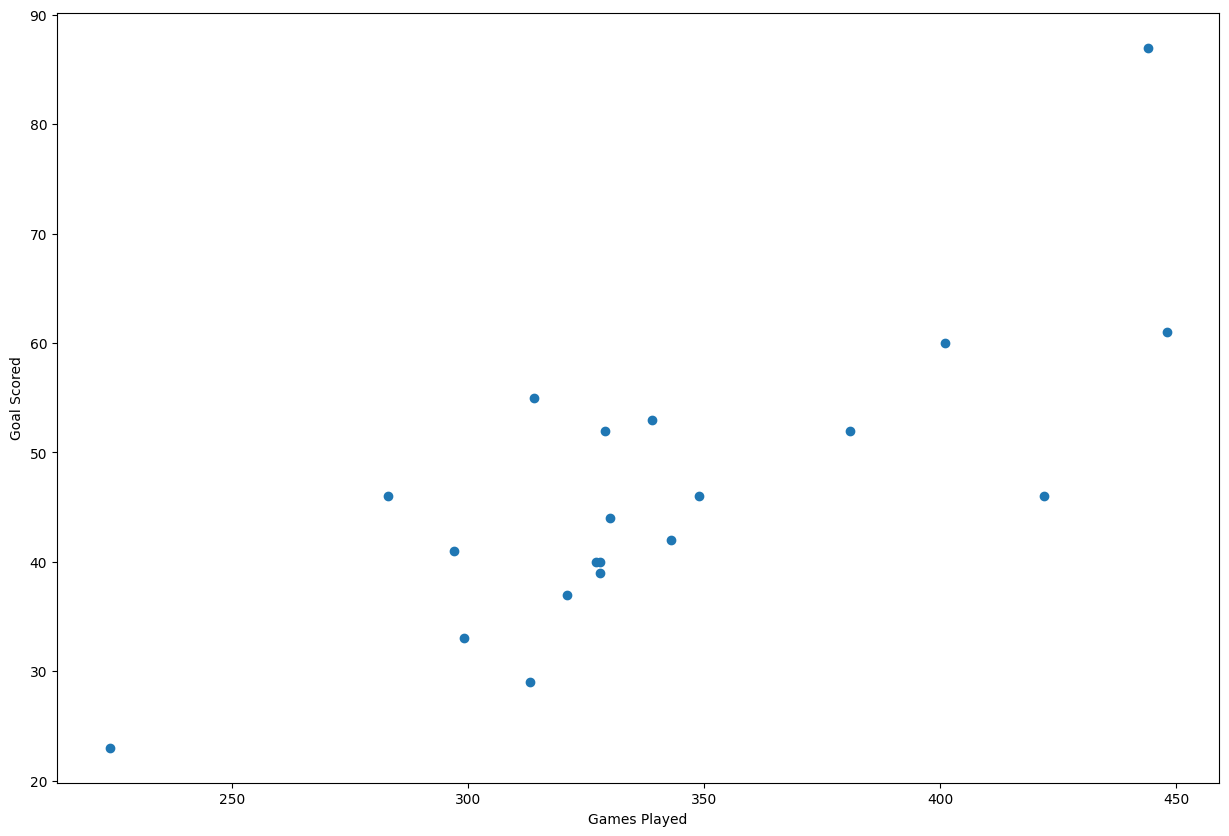

In [42]:
plt.figure(figsize=(15,10))
plt.scatter(groupby_Team['Shots'], groupby_Team['Goals scored'])
plt.xlabel('Games Played')
plt.ylabel('Goal Scored')
plt.show()

In [43]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(groupby_Team[['Shots','Goals scored']])
y_predicted

array([0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0])

In [44]:
groupby_Team.columns = ['Team','Games played' , 'Shots' , 'Goals scored', 
                                     'Assists','Yellow Cards','Red Cards','Passes','Offsides','Penalties scored']
groupby_Team['cluster']=y_predicted
groupby_Team

,Team,Games played,Shots,Goals scored,Assists,Yellow Cards,Red Cards,Passes,Offsides,Penalties scored,cluster
0,0,534,327,40,29,115,4,7158.868,75,5,0
1,1,513,339,53,36,97,5,6968.400,79,3,0
2,2,452,224,23,20,88,4,9069.697,54,3,2
3,3,503,299,33,23,98,1,9489.321,55,2,0
4,4,511,444,87,60,74,2,5321.519,95,8,1
5,5,503,283,46,32,95,6,8613.360,99,6,0
6,6,526,321,37,23,78,4,7640.791,60,6,0
7,7,509,314,55,40,98,7,8745.055,76,5,0
8,8,515,313,29,19,92,0,6766.493,93,4,0
9,9,494,329,52,35,68,6,9380.886,89,7,0


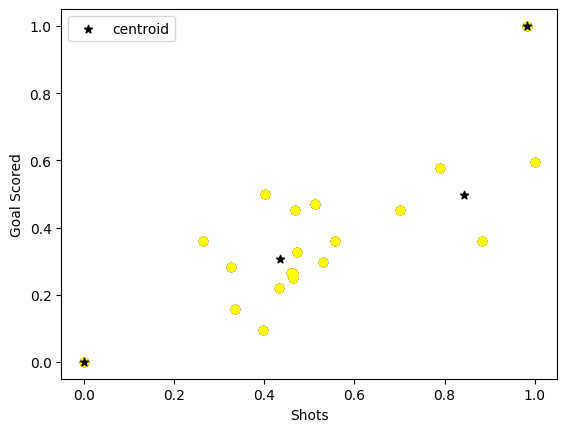

In [51]:
data1 = groupby_Team[groupby_Team.cluster==0]
data2 = groupby_Team[groupby_Team.cluster==1]
data3 = groupby_Team[groupby_Team.cluster==2]

plt.scatter(groupby_Team['Shots'],groupby_Team['Goals scored'],color='green')
plt.scatter(groupby_Team['Shots'],groupby_Team['Goals scored'],color='red')
plt.scatter(groupby_Team['Shots'],groupby_Team['Goals scored'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')

plt.xlabel('Shots')
plt.ylabel('Goal Scored')
plt.legend()

In [46]:
scaler = MinMaxScaler()
groupby_Team['Shots'] = scaler.fit_transform(groupby_Team[['Shots']])
groupby_Team['Goals scored'] = scaler.fit_transform(groupby_Team[['Goals scored']])

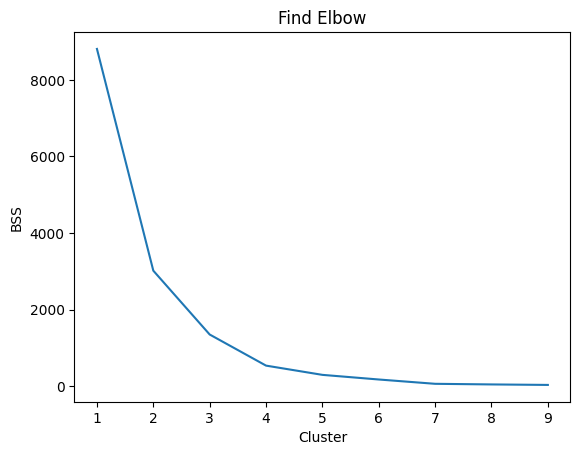

In [47]:
bss = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k, init="k-means++")
    km.fit(groupby_Team[['Games played','Goals scored']])
    bss.append(km.inertia_)

plt.xlabel('Cluster')
plt.ylabel('BSS')
plt.title('Find Elbow')
plt.plot(k_range,bss)

In [48]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(groupby_Team)

In [49]:
for i in range(2,12):
    labels= KMeans(n_clusters=i,init="k-means++",random_state=200).fit((groupby_Team[['Shots','Goals scored']])).labels_
    print ("Score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score((groupby_Team[['Shots','Goals scored']]),labels,metric="euclidean",sample_size=500,random_state=200)))

Score for k(clusters) = 2 is 0.5466321645202112
Score for k(clusters) = 3 is 0.31397936792095404
Score for k(clusters) = 4 is 0.4719788531190711
Score for k(clusters) = 5 is 0.3297189744823678
Score for k(clusters) = 6 is 0.3313311485907427
Score for k(clusters) = 7 is 0.28974543690173726
Score for k(clusters) = 8 is 0.3548336814430181
Score for k(clusters) = 9 is 0.3836460715902457
Score for k(clusters) = 10 is 0.3638427980583971
Score for k(clusters) = 11 is 0.33769585961482085


In [50]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(groupby_Team[['Shots','Goals scored']])
groupby_Team['cluster']=y_predicted
groupby_Team

,Team,Games played,Shots,Goals scored,Assists,Yellow Cards,Red Cards,Passes,Offsides,Penalties scored,cluster
0,0,534,0.459821,0.265625,29,115,4,7158.868,75,5,0
1,1,513,0.513393,0.468750,36,97,5,6968.400,79,3,0
2,2,452,0.000000,0.000000,20,88,4,9069.697,54,3,3
3,3,503,0.334821,0.156250,23,98,1,9489.321,55,2,0
4,4,511,0.982143,1.000000,60,74,2,5321.519,95,8,1
5,5,503,0.263393,0.359375,32,95,6,8613.360,99,6,0
6,6,526,0.433036,0.218750,23,78,4,7640.791,60,6,0
7,7,509,0.401786,0.500000,40,98,7,8745.055,76,5,0
8,8,515,0.397321,0.093750,19,92,0,6766.493,93,4,0
9,9,494,0.468750,0.453125,35,68,6,9380.886,89,7,0
